# Frobenius norm

The Frobenius norm of a matrix $\textbf{A}\in\mathbb{F}^{m\times n}$ is defined as $||\textbf{A}||_\textbf{F}=\displaystyle\sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2}$.

In [8]:
import numpy as np
import numpy.typing as npt
import scipy.linalg


def _force_2d(a: npt.NDArray) -> npt.NDArray:
    if a.ndim == 1:
        return np.expand_dims(a, -1)
    elif a.ndim == 2:
        return a
    elif a.ndim >= 3:
        return a.reshape((a.shape[0], -1))
    else:
        raise ValueError(f'I don\'t know how to deal with an array of shape {a.shape}!')


def fro_direct(a: npt.NDArray) -> float:
    return np.sqrt(np.square(a).sum()).item()


def fro_scipy(a: npt.NDArray) -> float:
    a = _force_2d(a)
    return scipy.linalg.norm(a, ord='fro').item()


def fro_numpy(a: npt.NDArray) -> float:
    a = _force_2d(a)
    return np.linalg.norm(a, ord='fro').item()


def fro_einsum(a: npt.NDArray) -> float:
    a = a.ravel()
    return np.sqrt(np.einsum('i,i', a, a)).item()


def fro_dot(a: npt.NDArray) -> float:
    a = a.ravel()
    return np.sqrt(np.dot(a, a)).item()

In [9]:
import math

rng = np.random.default_rng(seed=0)
arrays = [
    rng.normal(size=(10_000,)),
    rng.normal(size=(100, 100)),
    rng.normal(size=(50, 50, 50))
]

for a in arrays:
    assert math.isclose(fro_direct(a), fro_scipy(a))
    assert math.isclose(fro_direct(a), fro_numpy(a))
    assert math.isclose(fro_direct(a), fro_einsum(a))
    assert math.isclose(fro_direct(a), fro_dot(a))


Output()

(2.1439999999999993e-06, 0.009243413)


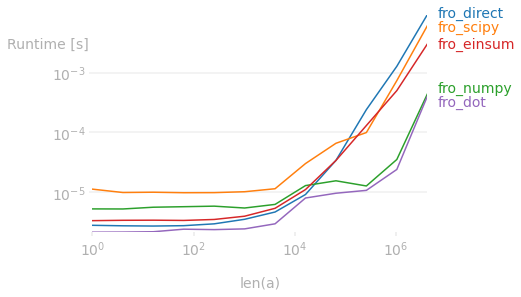

In [10]:
import perfplot

perfplot.show(
    setup=lambda n: rng.standard_normal(n),
    kernels=[fro_direct, fro_scipy, fro_numpy, fro_einsum, fro_dot],
    n_range=[(2 ** k) ** 2 for k in range(12)],
    equality_check=None,
    xlabel='len(a)',
)